# Uso de _clasecontrol.py_

En primer lugar es necesario importar el módulo con:

In [1]:
from clasecontrol import *

El módulo define variables más habituales:

In [2]:
s, t, Kp, Kc, Ti, Td, w

No es necesario ni escribir letras griegas ni subíndices.

## Definición de funciones de transferencia

Vamos a definir una función de primer orden:

$$G(s) = \frac{2}{s+1}$$

In [3]:
G = 2/(s+1)
G

Vamos a definir cinco funciones de transferencia de segundo orden ($K = 1$ y $\tau = 1$) con los coeficientes de amortiguamiento $\zeta = 0.1, 0.5, 1, 2$:

$$G_2 = \frac{1}{s^2 + 2 \cdot \zeta \cdot s +1}$$

In [4]:
G2 = [1/(s**2+2*zeta*s+1) for zeta in (.1, .5, 1, 2)]

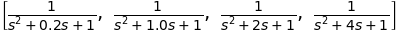

In [5]:
G2

Podemos operar las funciones de transferencia:

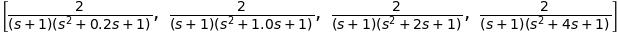

In [6]:
[G * i for i in G2]

Las funciones también podemos definirlas utilizando símbolos:

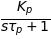

In [7]:
G3 = Kp/(Tp*s+1)
G3

Podemos definir símbolos:

In [8]:
k1, k2 = symbols("k_1 k_2")

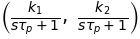

In [9]:
G4 = k1/(Tp*s+1)
G5 = k2/(Tp*s+1)
G4, G5

## Función de transferencia de lazo cerrado

A partir de la función de transferencia de lazo abierto, se puede calcular la función de transferencia de lazo cerrado:

In [10]:
closed_loop(G)

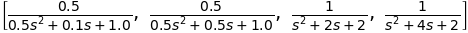

In [10]:
closed_loop(G2)

A partir de la funcion de lazo cerrado, tambien podemos encontrar la funcion de lazo abierto:

In [11]:
open_loop(2/(s+3))

In [12]:
open_loop(G2)

## Retrasos

Los retrasos se escriben de la manera habitual:

$$ G_d = \exp(-t_d \cdot s)$$

Por ejemplo:

In [13]:
Gd = G*exp(-s)
Gd

In [14]:
closed_loop(G*Gd)

## Respuestas a funciones singulares

### Escalon unidad

Representar la respuesta de una entrada en forma de escalon unidad es muy sencillo:

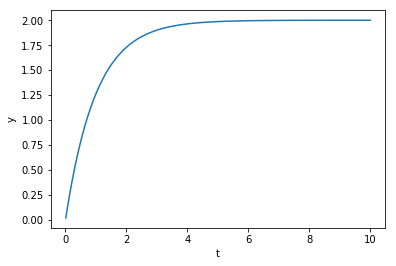

In [14]:
step(G)

Obtener informacion sobre los diferentes parametros de la funcion __step__ es muy sencillo:

In [15]:
help(step)

Help on function step in module clasecontrol:

step(g, tmin=0.01, tmax=10, n=100)
    Representa la respuesta de un proceso para una entrada en escalón
    unidad.



La instruccion __help__ funciona para todas las instrucciones del modulo.

Si quieremos representar la respuesta de varias funciones en un mismo grafico, tenemos dos opciones:

In [16]:
step(G)
step(Gd)

In [17]:
step([G, Gd])

In [18]:
step(G2, tmax=20)

### Función impulso

In [19]:
impulse(G)

In [20]:
impulse([G, Gd])

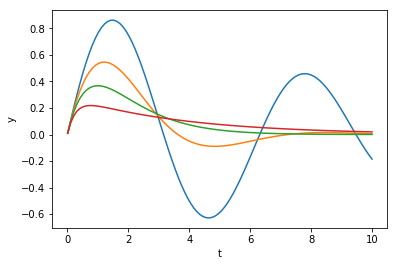

In [21]:
impulse(G2)

### Función sinusoidal

In [22]:
sinresp(G)

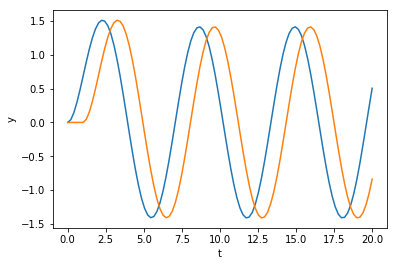

In [23]:
sinresp(G)
sinresp(Gd)

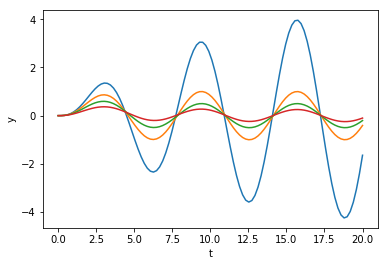

In [24]:
sinresp(G2)

### Respuesta a una entrada genérica

En el caso de querer obtener una respuesta a otra función de entrada se puede utilizar la instrucción __simul__:

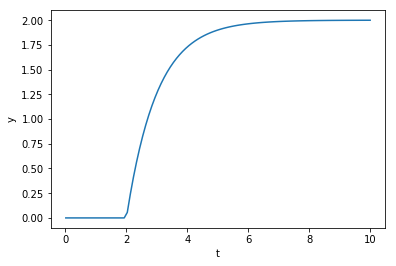

In [16]:
tt, yy = simul(G*1/s*exp(-2*s))

## Diagramas de Bode

Para representar el diagrama de Bode de un lazo de control, solo necesitamos conocer su función de transferencia de lazo abierto:

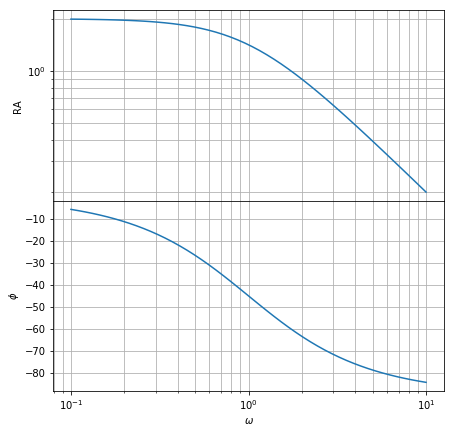

In [26]:
bode(G)

Si deseamos representar la frecuencia de cruce:

In [27]:
wco, RAco = bode(Gd, co = True)

In [28]:
wco, RAco

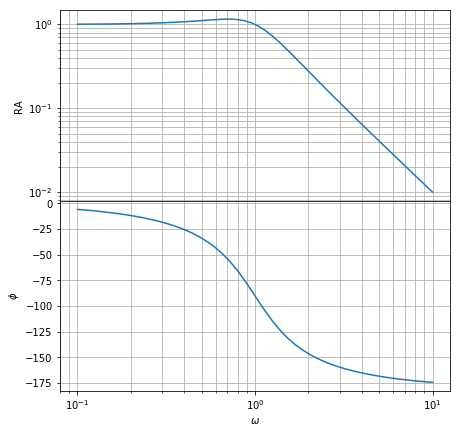

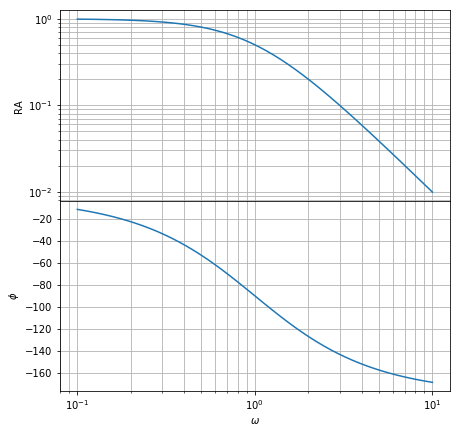

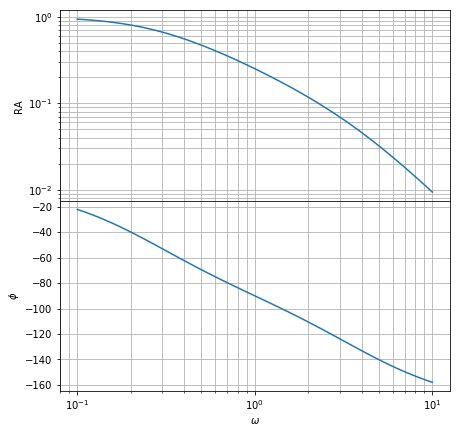

In [17]:
bode(G2)